In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import keras as keras

Using TensorFlow backend.


In [3]:
#source model ELMo
#url = "https://tfhub.dev/google/elmo/3"
#embed = hub.Module(url)


In [4]:
import pandas as pd
train = pd.read_csv(r"D:train4.csv",delimiter='|', encoding='utf-8')#buka file
train=train.dropna()
list(train.columns.values)
sentiment_counts = train.label.value_counts()

print(sentiment_counts)

1    73091
0    73091
Name: label, dtype: int64


In [5]:
import pandas as pd
test = pd.read_csv(r"D:test4.csv",delimiter='|', encoding='utf-8')#buka file
test=test.dropna()
list(test.columns.values)
sentiment_counts = test.label.value_counts()

print(sentiment_counts)

1    18201
0    18201
Name: label, dtype: int64


In [6]:
data = pd.concat([train, test])#gabung file

In [8]:
data.index = range(len(data))

In [9]:
x = np.array(data["tweet_stem"])
y = np.array(data["label"])

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(x)
le.fit(y)


LabelEncoder()

In [11]:
def encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def decode(le, one_hot):
    dec = np.argmax(one_hot, axis=1)
    return le.inverse_transform(dec)

In [12]:
test = encode(le, [1, 0, 1, 0])
test



array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [13]:
untest = decode(le, test)
untest

array([1, 0, 1, 0], dtype=int64)

In [14]:
x_enc = x
y_enc = encode(le, y)

In [15]:
print(x_enc,y_enc)

['gan cenk liat cebong bicara etika nutup mata amnesia rempong buka janji isi pidato cuti pas nyapres udah etika'
 'iya bakat bakat anggap orang dungu simple prabowo menang dpt peran tunggu fakta profesi tukang hujat modal baca tulis gitu repot'
 'gausah muter bosan plis' ...
 'sensasi pamor yaaa emang prabowo ken haters biar penaasaran penasaran muncul kelompok goblok dukung pelihara kuda'
 'hehepak lembut santap sanding dgn koleris'
 'korupsi kurang hilang preettt gak korupsi ngga hilang'] [[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [16]:
print(y_enc[6],y_enc[7],y_enc[8])

[0. 1.] [1. 0.] [1. 0.]


In [18]:
#membagi file training dan test
#x_train = np.asarray(x_train)
#y_train = np.asarray(y_train)

#x_test = np.asarray(x_test)
#y_test = np.asarray(y_test)
x_train = np.asarray(x_enc[:146067])
y_train = np.asarray(y_enc[:146067])

x_test = np.asarray(x_enc[146067:])
y_test = np.asarray(y_enc[146067:])


In [19]:
#word embedding ELMo
url = "module/module_elmo3"
embed = hub.Module(url)
def ELMoEmbedding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]

In [20]:

from keras.layers import Input, Lambda, Dense,LSTM,Concatenate,Embedding,GRU,Reshape,Dropout
from keras.models import Model
import keras.backend as K


In [31]:
#proses deep learning
input_text = Input(shape=(1,), dtype=tf.string)
embedding = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
embedding = Reshape((1, 1024), input_shape=(1024,))(embedding)
dropout2=Dropout(0.2)(embedding)
dense2 = GRU(130, activation='relu')(dropout2)#ganti LSTM/GRU
pred = Dense(2, activation='sigmoid')(dense2)
model = Model(inputs=[input_text], outputs=pred)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [32]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 1024)              0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 1, 1024)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1024)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 190)            923400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 190)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 130)               1251

In [23]:
#train
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())  
    session.run(tf.tables_initializer())
    history = model.fit(x_train, y_train, epochs=10, batch_size=32,validation_split=0.25)
    model.save_weights('./elmo-mix.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 109550 samples, validate on 36517 samples
Epoch 1/10
109550/109550 [==============================] - 753s 7ms/step - loss: 0.5548 - accuracy: 0.7107 - val_loss: 0.5076 - val_accuracy: 0.7556
Epoch 2/10
109550/109550 [==============================] - 723s 7ms/step - loss: 0.5172 - accuracy: 0.7409 - val_loss: 0.4651 - val_accuracy: 0.7777
Epoch 3/10
109550/109550 [==============================] - 724s 7ms/step - loss: 0.4952 - accuracy: 0.7562 - val_loss: 0.4519 - val_accuracy: 0.7905
Epoch 4/10
109550/109550 [==============================] - 723s 7ms/step - loss: 0.4794 - accuracy: 0.7678 - val_loss: 0.4352 - val_accuracy: 0.8016
Epoch 5/10
109550/109550 [==============================] - 726s 7ms/step - loss: 0.4710 - accuracy: 0.7740 - val_loss: 0.4286 - val_accuracy: 0.8080
Epoch 6/10
109550/109550 [==============================] - 722s 7ms/step - loss: 0.4612 - accuracy: 0.

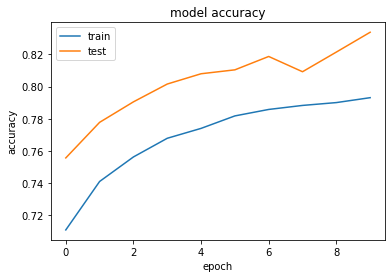

In [29]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

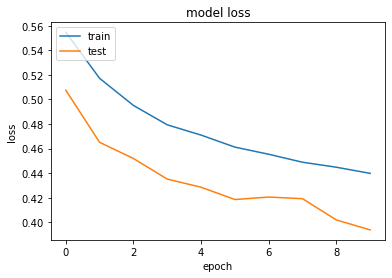

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
#load model
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    #model.load_weights('./elmo-model61.h5')  
    predicts = model.predict(x_test, batch_size=32)
    print(model.evaluate(x_test,y_test))

36517/36517 [==============================] - 183s 5ms/step
[0.6938312890091082, 0.4583618640899658]


In [26]:
y_test = decode(le, y_test)
y_preds = decode(le, predicts)

In [27]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# predict probabilities for test set
#yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_preds)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_preds)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_preds)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_preds)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, y_preds)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_preds)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_preds)
print(matrix)

Accuracy: 0.458362
Precision: 0.291058
Recall: 0.054281
F1 score: 0.091498
Cohens kappa: -0.078931
ROC AUC: 0.460375
[[15742  2426]
 [17353   996]]


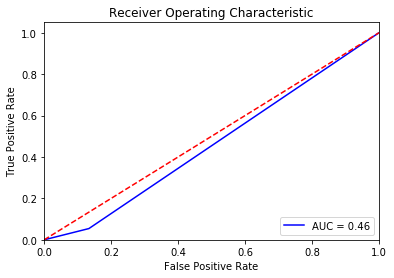

In [28]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
#uji model
new_text =  ['hoaks dirituit',
             'najis njingg penjilatt',
             'kamprettt kesasar',
             'jokowi bangun infrastruktur'
            ]
new_text_pr = np.array(new_text, dtype=object)[:, np.newaxis]

In [55]:
#from tensorflow.keras.models import Sequential

#from keras.models import Model
#model = Sequential()
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())  
    session.run(tf.tables_initializer())
    model.load_weights('./elmo-model62.h5') 
    import time
    t = time.time()
    rt = model.predict(new_text_pr)
    print("time: ", time.time() - t)
    #print(predicts)

time:  5.375783681869507


In [56]:
cc = decode(le, rt)
print(cc)

[1 0 1 0]
